**Connect with google drive**

**Step_1: Get the data of 20 companies from yahoo web and store in google drive**

In [1]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import pandas as pd
import datetime

In [32]:

yf.pdr_override()


#datetime is a Python module


# Set the start and end date
start_date = '2017-01-01'

# Get data to today
today = datetime.datetime.today()

# Set the list including 20'str' acronym of 20 companies
list = ['INTC','AMD', 'CSCO', 'AAPL', 'MU', 'NVDA', 'QCOM', 'AMZN', 'NFLX', 'FB', 'GOOG', 'BABA', 'EBAY', 'IBM', 'XLNX', 'TXN', 'NOK', 'TSLA', 'MSFT', 'SNPS']

# Get the data
files=[]

# Create a data folder in my google drive.
def SaveData(df, filename):
  df.to_csv('Dataset/'+filename+'.csv')

def GetData(acronym):
  print (acronym)
  data = pdr.get_data_yahoo(acronym, start = start_date, end = today )
  dataname= acronym
  files.append(dataname)
  SaveData(data, dataname)

print("Today is " + str(today))
#Get data, and save that data as "str".csv
for i in list:
  GetData(i)
  

Today is 2021-07-17 16:25:48.213439
INTC
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MU
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
QCOM
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
BABA
[*********************100%***********************]  1 of 1 completed
EBAY
[*********************100%***********************]  1 of 1 completed
IBM
[**

### Requirement: 
30 ngày liên tiếp là input đầu vào của cột Adj => Predict ra cho ngày 31 

In [27]:
df = pd.read_csv("Dataset/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.413372,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.382690,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600
...,...,...,...,...,...,...,...
1137,2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700
1138,2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100698900
1139,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
1140,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300


In [28]:
df = df.reset_index()['Adj Close']
df

0        27.413372
1        27.382690
2        27.521944
3        27.828764
4        28.083660
           ...    
1137    144.500000
1138    145.639999
1139    149.149994
1140    148.479996
1141    146.389999
Name: Adj Close, Length: 1142, dtype: float64

In [29]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [30]:
print(df)

[[2.51969201e-04]
 [0.00000000e+00]
 [1.14360434e-03]
 ...
 [1.00000000e+00]
 [9.94497717e-01]
 [9.77333862e-01]]


In [31]:
#splitting dataset into train and test split
training_size = int(len(df)*0.7)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]
training_size, test_size

(799, 343)

In [32]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
X_train.shape

(768, 30)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [36]:
X_train.shape

(768, 30, 1)

**Step_2: Working with LSTM model**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np
import tensorflow as tf

In [38]:
model = Sequential()
model.add(LSTM(15, return_sequences=True,input_shape=(30,1)))
model.add(LSTM(15, return_sequences=True))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 15)            1020      
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 15)            1860      
_________________________________________________________________
lstm_5 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 4,756
Trainable params: 4,756
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, validation_data = (X_test,ytest), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
12/12 [==============================] - 4s 96ms/step - loss: 0.0181 - val_loss: 0.1986
Epoch 2/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0052 - val_loss: 0.1609
Epoch 3/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0034 - val_loss: 0.1041
Epoch 4/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0016 - val_loss: 0.0231
Epoch 5/200
12/12 [==============================] - 0s 22ms/step - loss: 5.7014e-04 - val_loss: 0.0037
Epoch 6/200
12/12 [==============================] - 0s 19ms/step - loss: 5.7270e-04 - val_loss: 0.0032
Epoch 7/200
12/12 [==============================] - 0s 22ms/step - loss: 4.5046e-04 - val_loss: 0.0071
Epoch 8/200
12/12 [==============================] - 0s 22ms/step - loss: 4.4922e-04 - val_loss: 0.0058
Epoch 9/200
12/12 [==============================] - 0s 21ms/step - loss: 4.5654e-04 - val_loss: 0.0050
Epoch 10/200
12/12 [==============================] - 0s 20ms/step - loss: 4.490

12/12 [==============================] - 0s 20ms/step - loss: 1.8250e-04 - val_loss: 0.0081
Epoch 80/200
12/12 [==============================] - 0s 20ms/step - loss: 1.9921e-04 - val_loss: 0.0127
Epoch 81/200
12/12 [==============================] - 0s 20ms/step - loss: 1.8196e-04 - val_loss: 0.0130
Epoch 82/200
12/12 [==============================] - 0s 18ms/step - loss: 1.8722e-04 - val_loss: 0.0126
Epoch 83/200
12/12 [==============================] - 0s 20ms/step - loss: 2.0459e-04 - val_loss: 0.0156
Epoch 84/200
12/12 [==============================] - 0s 20ms/step - loss: 1.9976e-04 - val_loss: 0.0104
Epoch 85/200
12/12 [==============================] - 0s 20ms/step - loss: 1.8702e-04 - val_loss: 0.0145
Epoch 86/200
12/12 [==============================] - 0s 20ms/step - loss: 1.9587e-04 - val_loss: 0.0099
Epoch 87/200
12/12 [==============================] - 0s 18ms/step - loss: 1.8787e-04 - val_loss: 0.0143
Epoch 88/200
12/12 [==============================] - 0s 20ms/step -

12/12 [==============================] - 0s 19ms/step - loss: 1.4700e-04 - val_loss: 0.0135
Epoch 157/200
12/12 [==============================] - 0s 20ms/step - loss: 1.4236e-04 - val_loss: 0.0129
Epoch 158/200
12/12 [==============================] - 0s 20ms/step - loss: 1.4010e-04 - val_loss: 0.0116
Epoch 159/200
12/12 [==============================] - 0s 19ms/step - loss: 1.4652e-04 - val_loss: 0.0123
Epoch 160/200
12/12 [==============================] - 0s 19ms/step - loss: 1.4187e-04 - val_loss: 0.0129
Epoch 161/200
12/12 [==============================] - 0s 19ms/step - loss: 1.4278e-04 - val_loss: 0.0134
Epoch 162/200
12/12 [==============================] - 0s 19ms/step - loss: 1.4196e-04 - val_loss: 0.0148
Epoch 163/200
12/12 [==============================] - 0s 19ms/step - loss: 1.4713e-04 - val_loss: 0.0093
Epoch 164/200
12/12 [==============================] - 0s 21ms/step - loss: 1.6060e-04 - val_loss: 0.0118
Epoch 165/200
12/12 [==============================] - 0s 20

**Step_3: Get results**

In [43]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [44]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Step_4: Check**

In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

48.5219832476966

In [46]:
math.sqrt(mean_squared_error(ytest, test_predict))

105.82502297105673

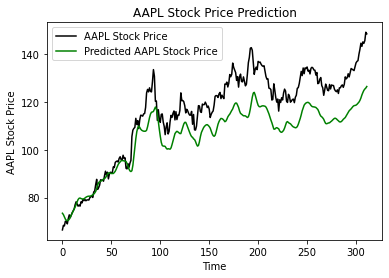

In [47]:
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(ytest.reshape(-1,1)), color = 'black', label = 'AAPL Stock Price')
plt.plot(test_predict, color = 'green', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()